In [44]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
import sys
sys.setrecursionlimit(10000) # 10000 is an example, try with different values
import seaborn as sns


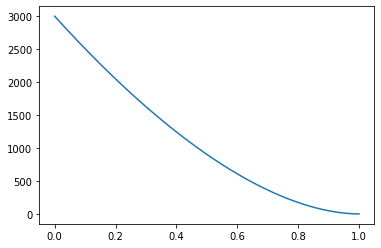

In [52]:
f = lambda x : np.power(np.arccos(x),4) * np.power(2*pi - np.arccos(x),4)
x = np.linspace(0,1,500)
plt.plot(x,f(x))

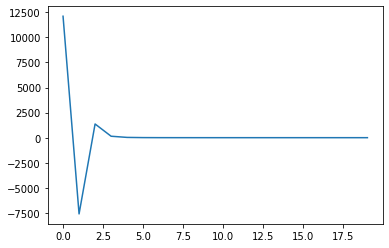

In [32]:
# On calcul les produits scalaires sans utiliser la transformee de fourier
def sc (f,n,N):
    t = np.linspace(0,2*pi,N)
    g = f(np.cos(t)) * np.cos(n*t)
    I = g.sum()
    I = pi*I/N
    return I

res = np.zeros(20)
for n in range(20):
    res[n] = sc(f,n,1000)
    
plt.plot(range(20),res)

I =  0.11756181748355438


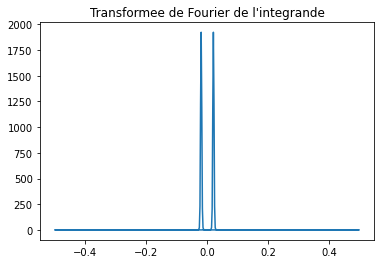

In [33]:
# On commence par un exemple avec n = 10
t = np.linspace(0,2*pi,500)
g = f(np.cos(t)) * np.cos(10*t)
fft = np.fft.fft(g)
fft/= len(fft)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,np.abs(fft))
plt.title("Transformee de Fourier de l'integrande")

# Calcul de l'integrale
I = 2*pi*fft[0]
m = len(fft)
J = np.arange(m)
for k in range(1,int(m/2)):
    S = np.cos(2*J*k*pi/m).sum()
    I += 2*pi/m * (fft[k] + fft[int(m/2 + k)] ) * S

I = np.real(I/2)
print ("I = ", I)

<ipython-input-31-79b0fe286006>:1: RuntimeWarning: invalid value encountered in arccos
  f = lambda x : np.power(np.arccos(x),4) * np.power(2*pi - np.arccos(x),4)


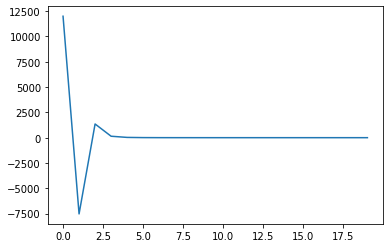

In [34]:
# Methode generale
def scwft(f,n):
    t = np.linspace(0,2*pi,100)
    g = f(np.cos(t)) * np.cos(n*t)
    fft = np.fft.fft(g)
    m = len(fft)
    fft /= m
    a0 = 2/(m-1) * f(t).sum()
    I = 2*pi*fft[0]
    J = np.arange(m)
    for k in range(1,int(m/2)):
        S = np.cos(2*pi*k*J/m).sum()
        I += (2*pi)/m * (fft[k] + fft[int(m/2)+k]) * S

    I = np.real(I/2)
    return I

res = np.zeros(20)
for n in range(20):
    res[n] = scwft(f,n)
    
plt.plot(range(20),res)

# Les ordres de grandeurs relatifs ont l'air bon mais les valeurs absolues semblent etre bien trop grandes
# Les valeurs grandissent avec la valeur de N dans linspace

<ipython-input-52-d5b86d127aca>:1: RuntimeWarning: invalid value encountered in arccos
  f = lambda x : np.power(np.arccos(x),4) * np.power(2*pi - np.arccos(x),4)
/home/jules/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jules/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


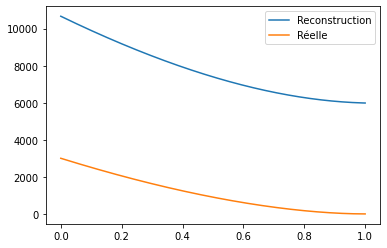

In [58]:
def tchebychev(n,x):
    l = len(x)
    T = np.zeros((n,l))
    T[0,:] = np.ones(l)
    T[1,:] = x
    for k in range(2,n):
        T[k,:] = 2*x*T[k-1,:] - T[k-2,:]
    return T

j = 5
sc = np.zeros(j)
for k in range(j):
    sc[k] = scwft(f,k)

x = np.linspace(0,1,500)
T = tchebychev(j,x)
h = np.zeros(500)
for k in range(j):
    h += sc[k] * T[k,:]

plt.figure()
sns.lineplot(x,h,label="Reconstruction")
sns.lineplot(x,f(x),label="Réelle")
plt.legend()